In [1]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

In [2]:
def RGBtoYCbCr(picture):
    YCbCrpicture = np.copy(picture)
    for x, row in enumerate(YCbCrpicture):
        for y, col in enumerate(row):
            YCbCrpicture[x][y][0] = 0.299 * picture[x][y][0] + 0.587 * picture[x][y][1] + 0.114 * picture[x][y][2]
            YCbCrpicture[x][y][1] = 128 - 0.168736 * picture[x][y][0] - 0.331264 * picture[x][y][1] + 0.5 * picture[x][y][2]
            YCbCrpicture[x][y][2] = 128 + 0.5 * picture[x][y][0] - 0.418688 * picture[x][y][1] - 0.081312 * picture[x][y][2]
    return YCbCrpicture

In [3]:
def YCbCrtoRGB(picture):
    RGBpicture = np.copy(picture)
    for x, row in enumerate(RGBpicture):
        for y, col in enumerate(row):
            RGBpicture[x][y][0] = picture[x][y][0] + 1.402 * (picture[x][y][2] - 128) 
            RGBpicture[x][y][1] = picture[x][y][0] - 0.34414 * (picture[x][y][1] - 128) - 0.71414 * (picture[x][y][2] - 128)
            RGBpicture[x][y][2] = picture[x][y][0] + 1.772   * (picture[x][y][1] - 128)
    return RGBpicture

In [4]:
lena = misc.imread('images/LENA_512.jpg')
ship = misc.imread('images/statek_640_505.jpg')

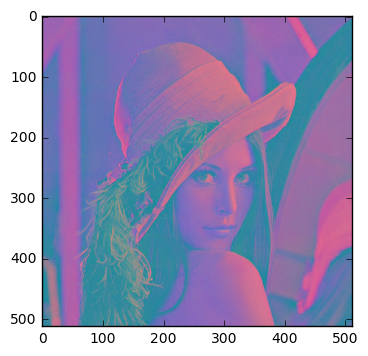

In [5]:
s3 = RGBtoYCbCr(lena)
plt.imshow(s3)
plt.show()

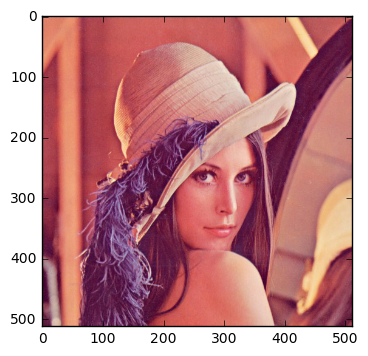

In [6]:
s4 = YCbCrtoRGB(RGBtoYCbCr(lena))
plt.imshow(s4)
plt.show()

In [13]:
def RGBtoHLS(picture):
    HLSpicture = np.copy(picture)
    for x, row in enumerate(HLSpicture):
        for y, col in enumerate(row):
            HLSpicture[x][y][0] = (maxp(picture,x,y)+minp(picture,x,y))/2
            if (HLSpicture[x][y][0] < 0.5):
                HLSpicture[x][y][1] = (maxp(picture,x,y)-minp(picture,x,y))/(maxp(picture,x,y)+minp(picture,x,y))
            if (HLSpicture[x][y][0] >= 0.5):
                HLSpicture[x][y][1] = (maxp(picture,x,y)-minp(picture,x,y))/2-(maxp(picture,x,y)+minp(picture,x,y))
            if (maxp(picture,x,y) == picture[x][y][0]):
                HLSpicture[x][y][2] = (60*(picture[x][y][1]-picture[x][y][2]))/HLSpicture[x][y][1]
            if (maxp(picture,x,y) == picture[x][y][1]):
                HLSpicture[x][y][2] = 120 + (60*(picture[x][y][1]-picture[x][y][2]))/HLSpicture[x][y][1]
            if (maxp(picture,x,y) == picture[x][y][2]):
                HLSpicture[x][y][2] = 240 + 120 + (60*(picture[x][y][1]-picture[x][y][2]))/HLSpicture[x][y][1]
    return HLSpicture

In [11]:
def maxp (picture,x,y):
    return max(max(picture[x][y][0],picture[x][y][1]),picture[x][y][2])

In [12]:
def minp (picture,x,y):
    return min(min(picture[x][y][0],picture[x][y][1]),picture[x][y][2])

C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in long_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide 

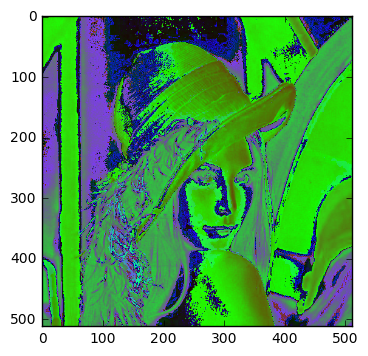

In [14]:
s3 = RGBtoHLS(lena)
plt.imshow(s3)
plt.show()